## Modules importing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Settings & constants

In [3]:
np.random.seed(42)

n = 1000
bins_list = [5, 10, 20, 30, 100]
h_list = [0.01, 0.1, 0.2, 0.5, 1]
x_linspace = np.linspace(start=-10, stop=10, num=2000)[:, None]

## Kernals from scratch

In [4]:
def gaussian_kernal(x):
    return np.exp((-np.power(x, 2)/2))/(np.sqrt(2*np.pi))

def epanechnikov_kernal(x):
    return (0.75*(1 - np.power(x, 2))) * (np.abs(x) <= 1).astype(int)

In [5]:
def estimate(linspace, sample, h, kernal):
    return np.sum(kernal((linspace - sample) / h), axis=1) / (n*h)

## а) Рівномірного розподілу U(-1, 3)

In [6]:
X = np.random.uniform(low=-1, high=3, size=n)

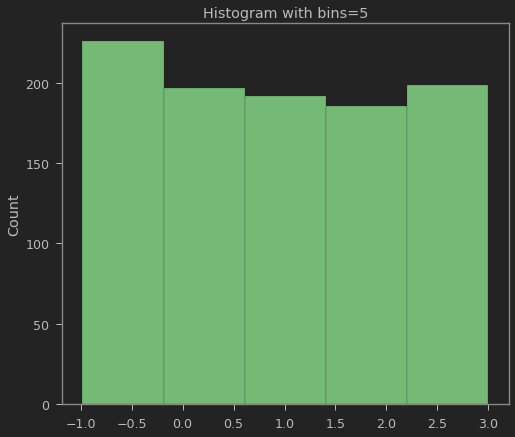

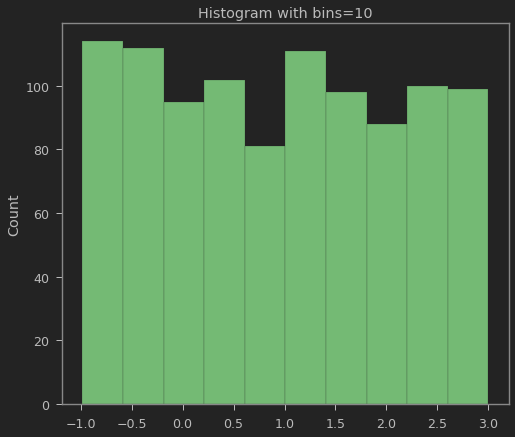

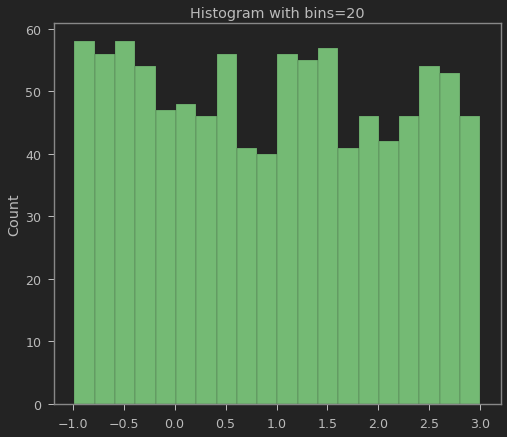

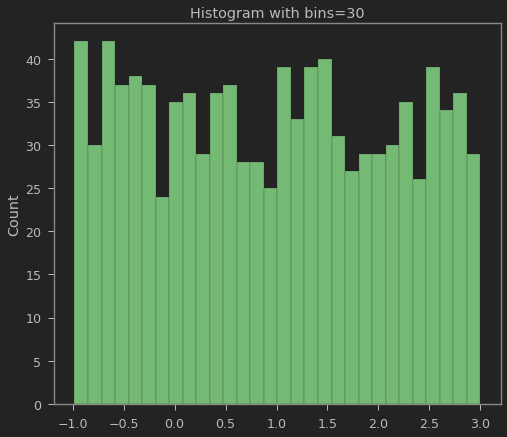

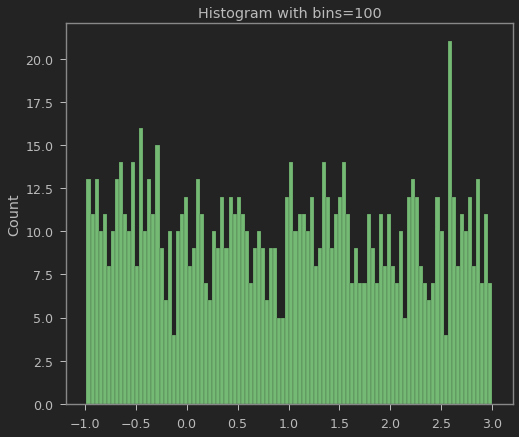

In [7]:
for bins in bins_list:
    sns.histplot(X, color='lightgreen', bins=bins);
    plt.title(f'Histogram with bins={bins}')
    plt.show()

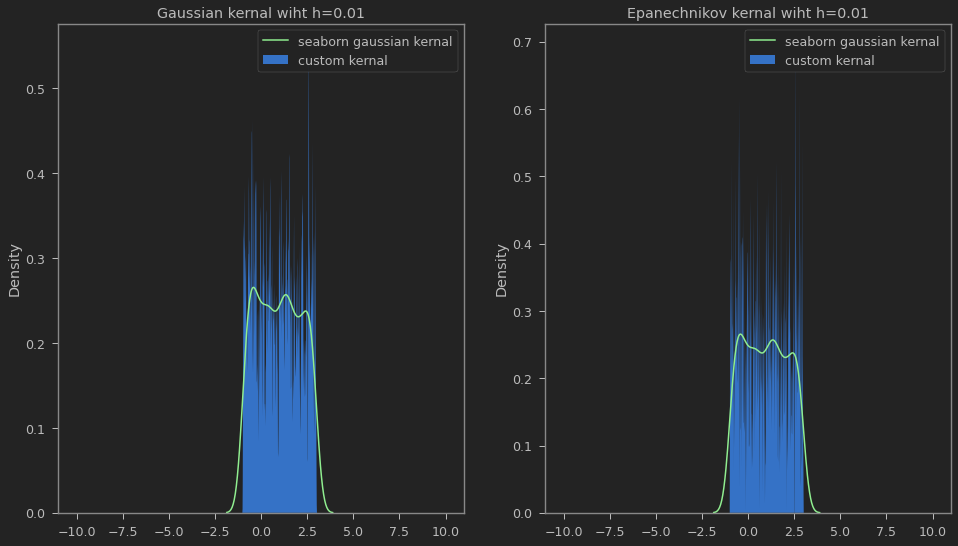

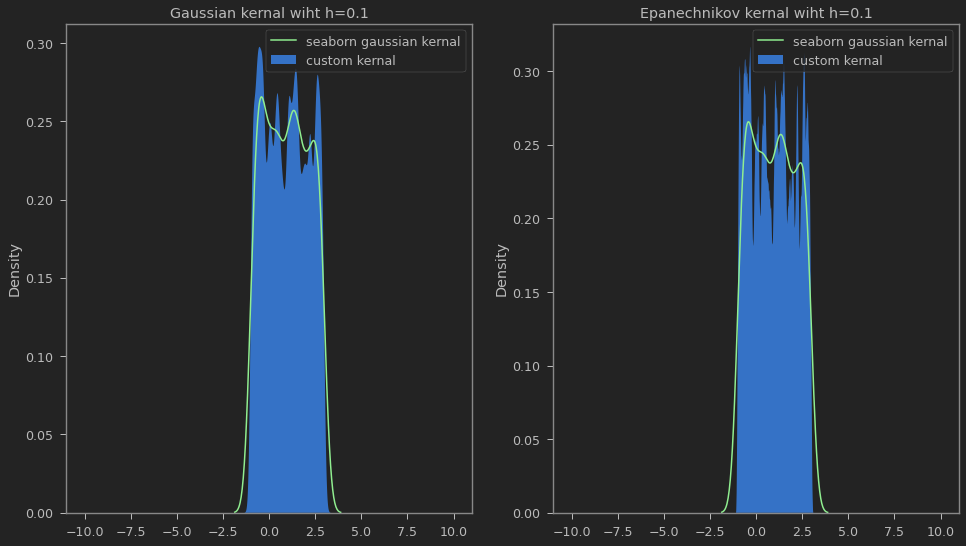

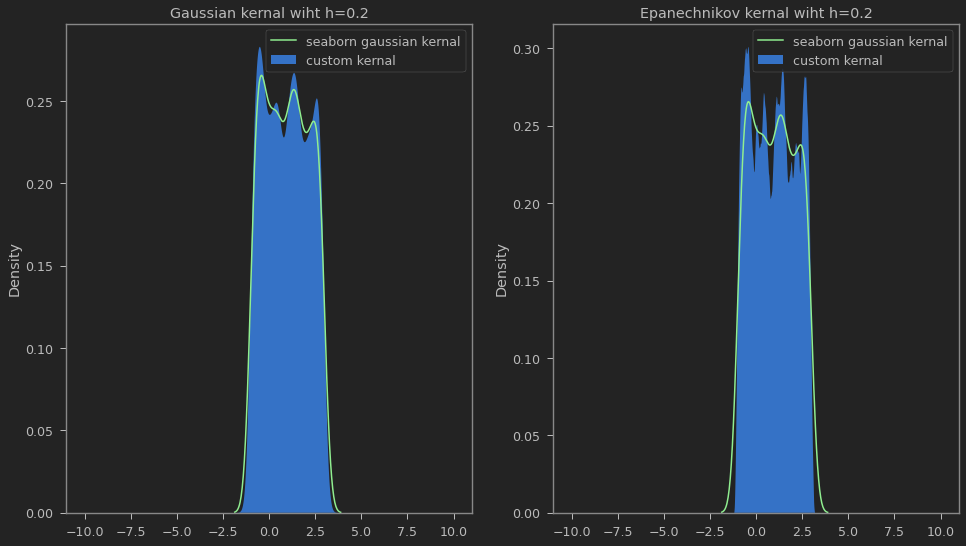

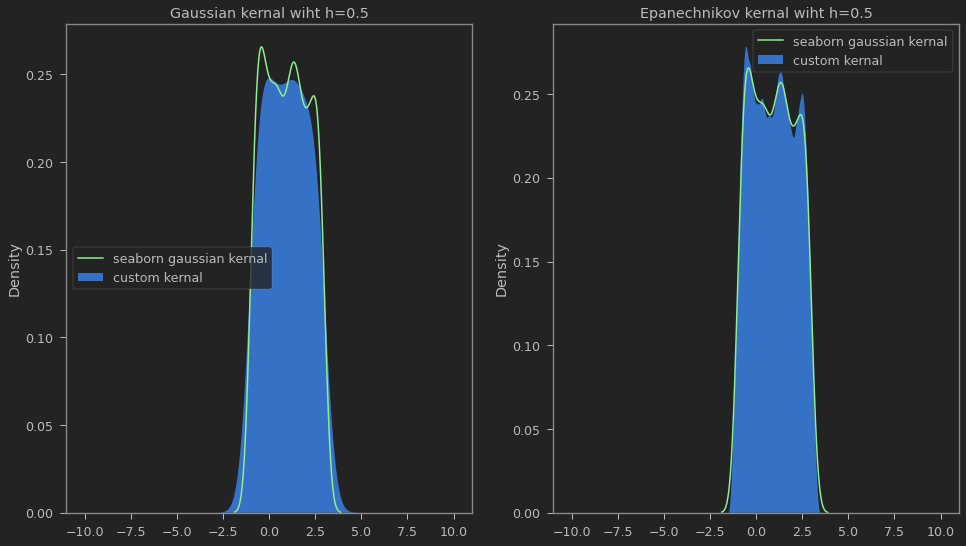

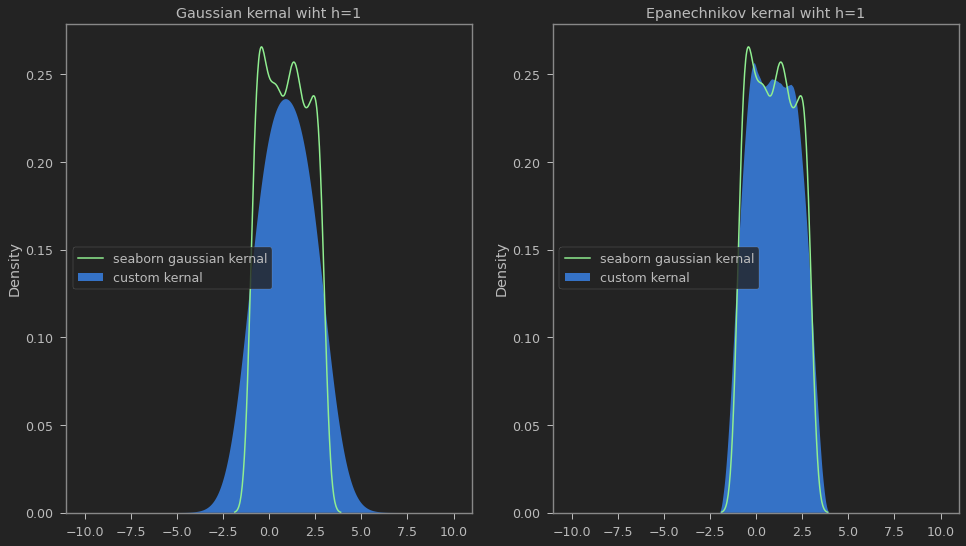

In [8]:
for h in h_list:
    fig, axs = plt.subplots(1, 2, figsize=(16, 9))
    
    axs[0].fill(x_linspace, estimate(x_linspace, X, h, gaussian_kernal), label='custom kernal')
    sns.distplot(X, hist=False, ax=axs[0], color='lightgreen', label='seaborn gaussian kernal')
    axs[0].set_title(f'Gaussian kernal wiht h={h}')
    axs[0].legend()
    
    axs[1].fill(x_linspace, estimate(x_linspace, X, h, epanechnikov_kernal), label='custom kernal')
    sns.distplot(X, hist=False, ax=axs[1], color='lightgreen', label='seaborn gaussian kernal')
    axs[1].set_title(f'Epanechnikov kernal wiht h={h}')
    axs[1].legend()
    
    plt.show()

## b) Показникового розподілу Exp(1)

In [9]:
X = np.random.exponential(scale=1, size=n)

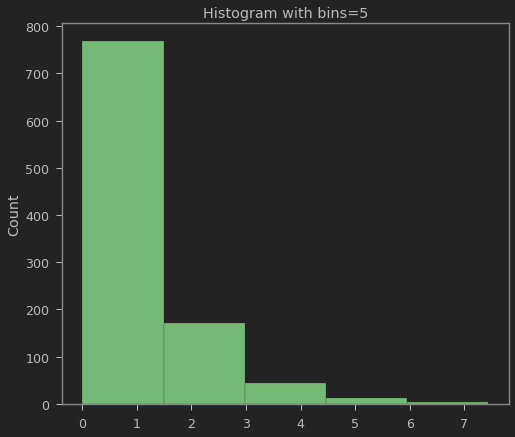

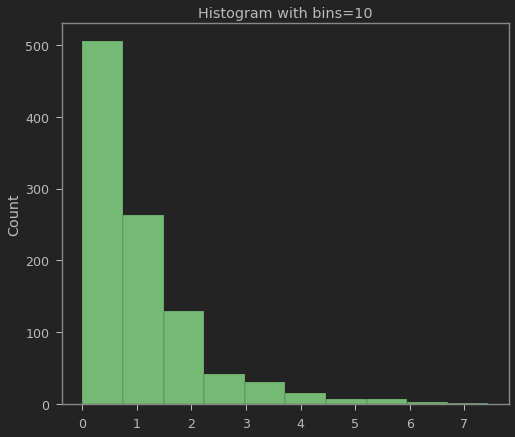

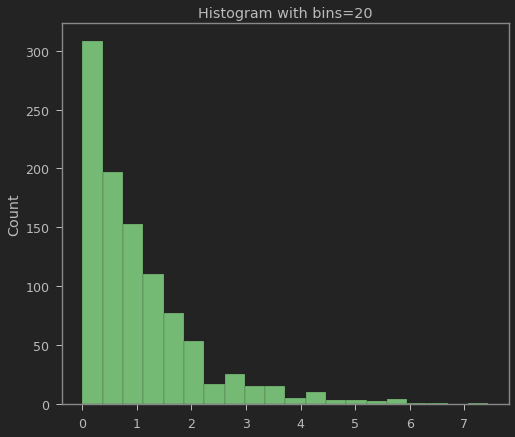

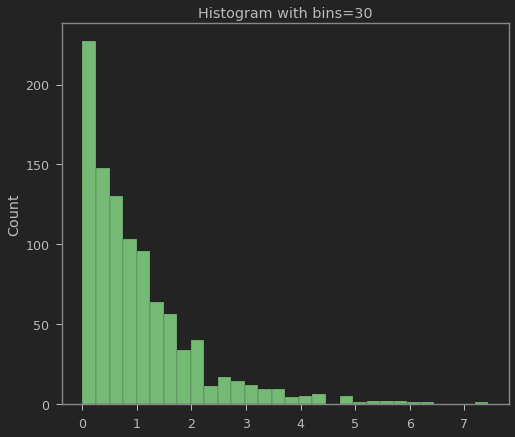

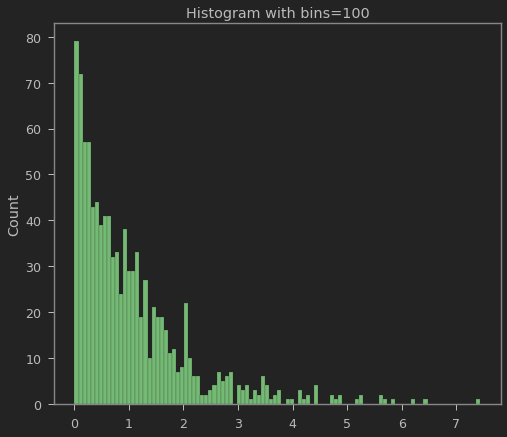

In [10]:
for bins in bins_list:
    sns.histplot(X, color='lightgreen', bins=bins);
    plt.title(f'Histogram with bins={bins}')
    plt.show()

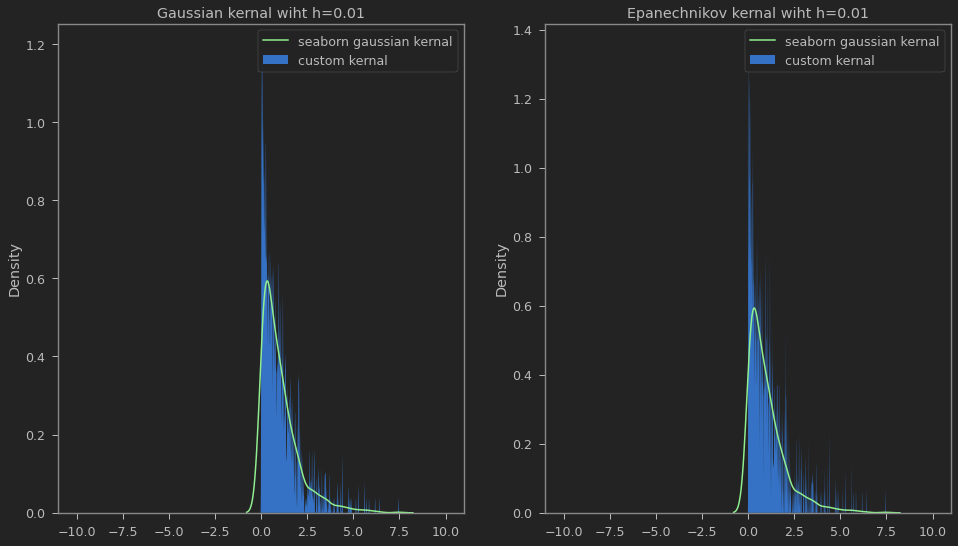

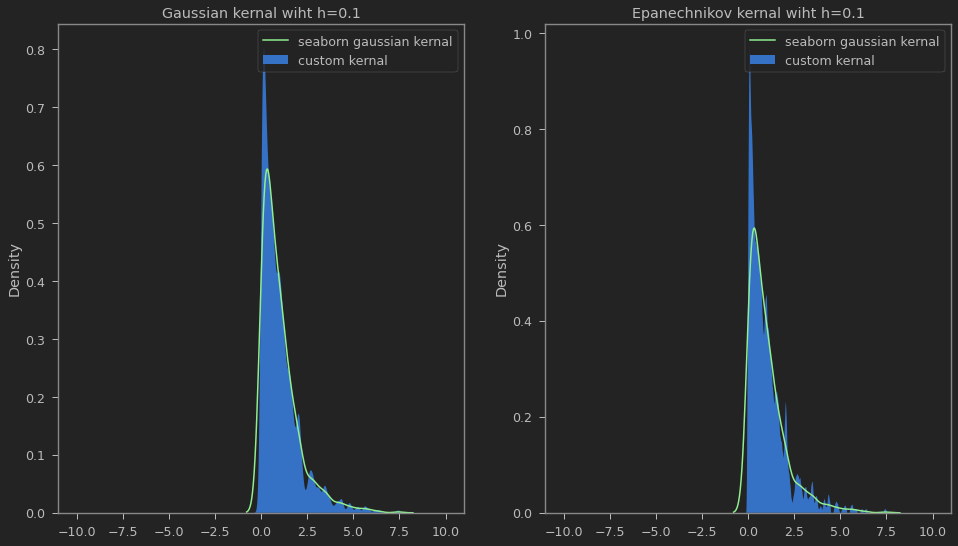

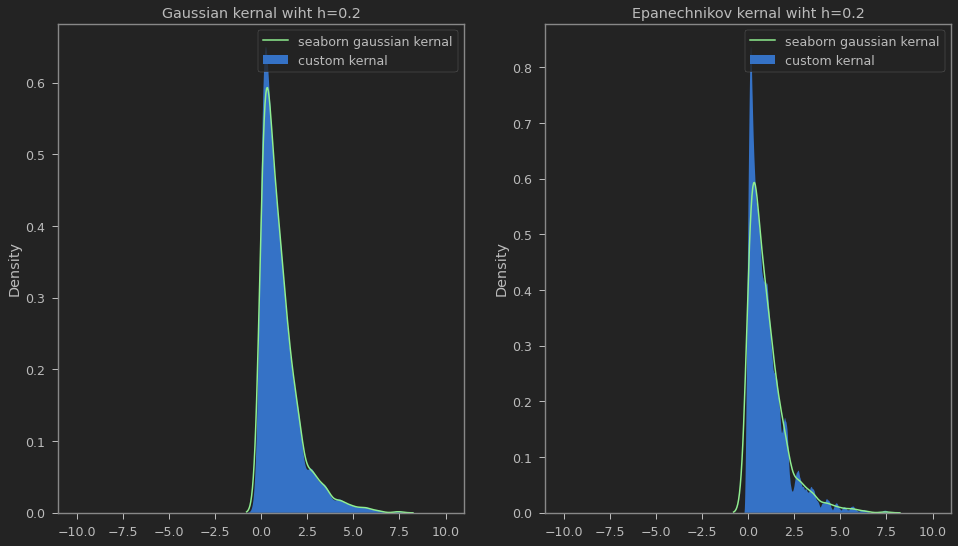

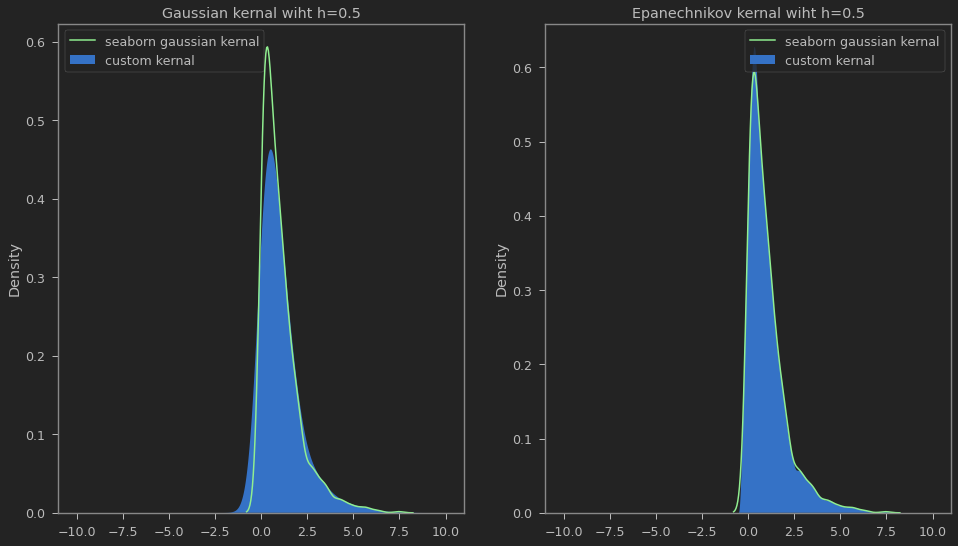

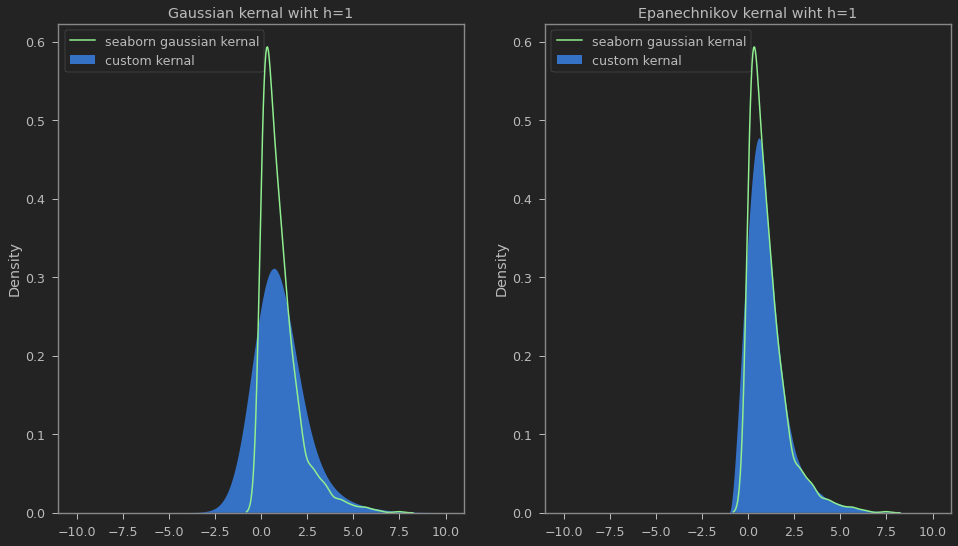

In [11]:
for h in h_list:
    fig, axs = plt.subplots(1, 2, figsize=(16, 9))
    
    axs[0].fill(x_linspace, estimate(x_linspace, X, h, gaussian_kernal), label='custom kernal')
    sns.distplot(X, hist=False, ax=axs[0], color='lightgreen', label='seaborn gaussian kernal')
    axs[0].set_title(f'Gaussian kernal wiht h={h}')
    axs[0].legend()
    
    axs[1].fill(x_linspace, estimate(x_linspace, X, h, epanechnikov_kernal), label='custom kernal')
    sns.distplot(X, hist=False, ax=axs[1], color='lightgreen', label='seaborn gaussian kernal')
    axs[1].set_title(f'Epanechnikov kernal wiht h={h}')
    axs[1].legend()
    
    plt.show()

## c) Нормального розподілу N(1, 4)

In [12]:
X = np.random.normal(loc=1, scale=4, size=n)

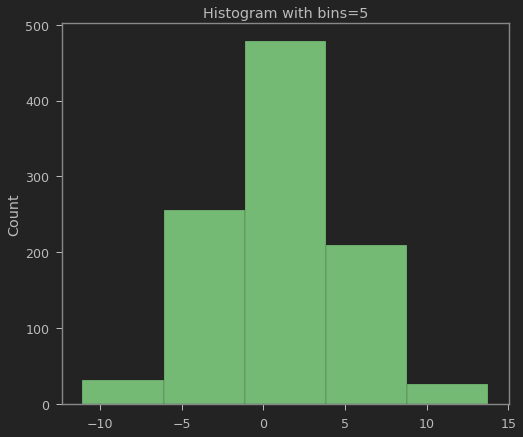

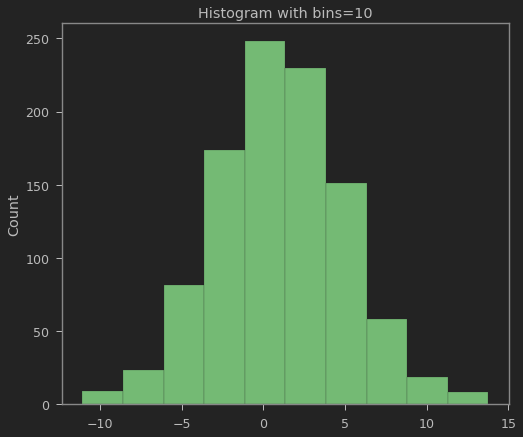

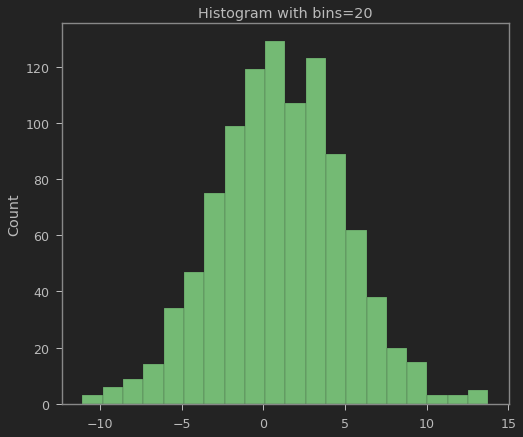

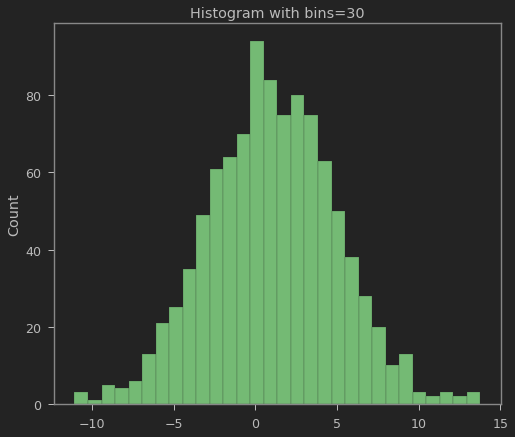

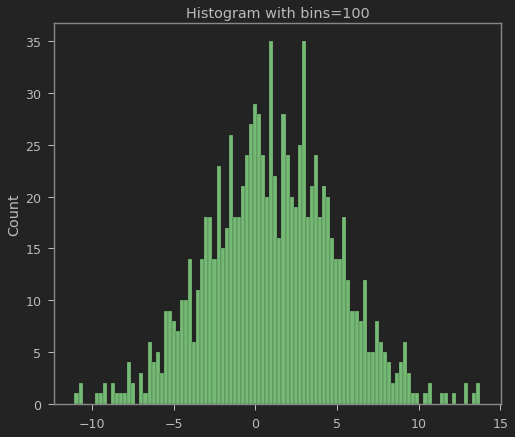

In [13]:
for bins in bins_list:
    sns.histplot(X, color='lightgreen', bins=bins);
    plt.title(f'Histogram with bins={bins}')
    plt.show()

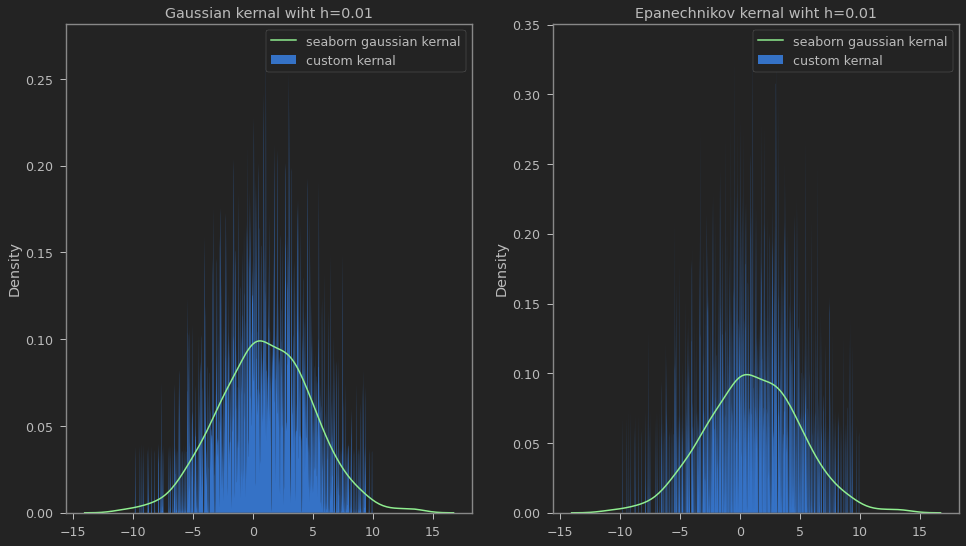

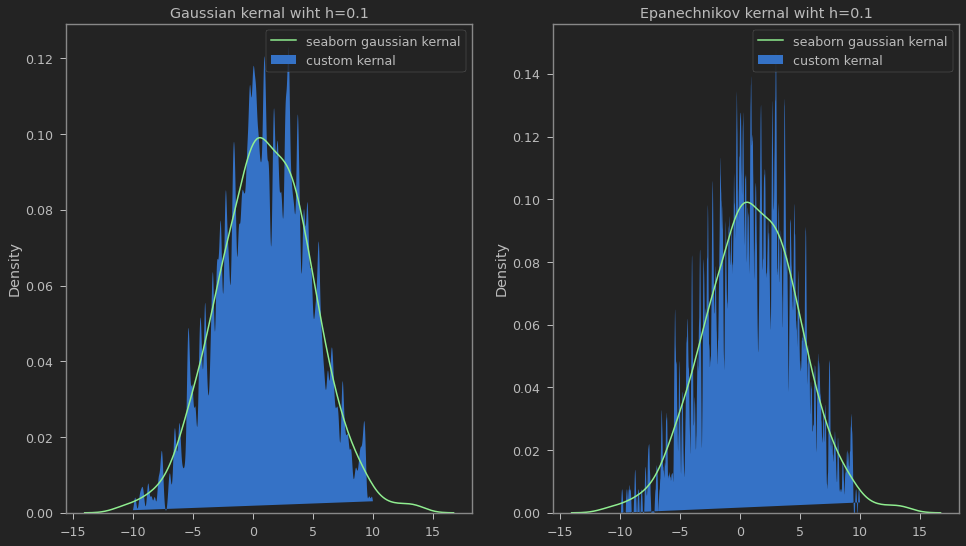

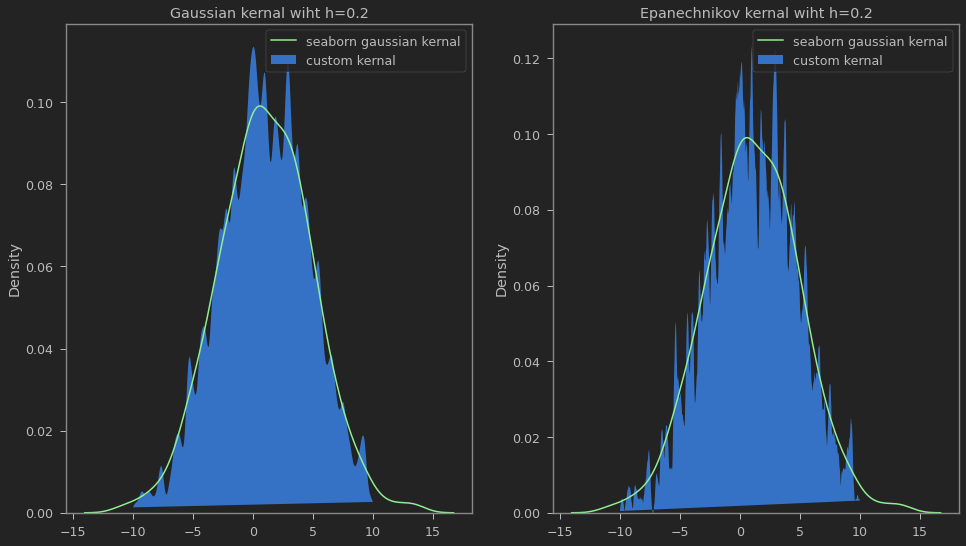

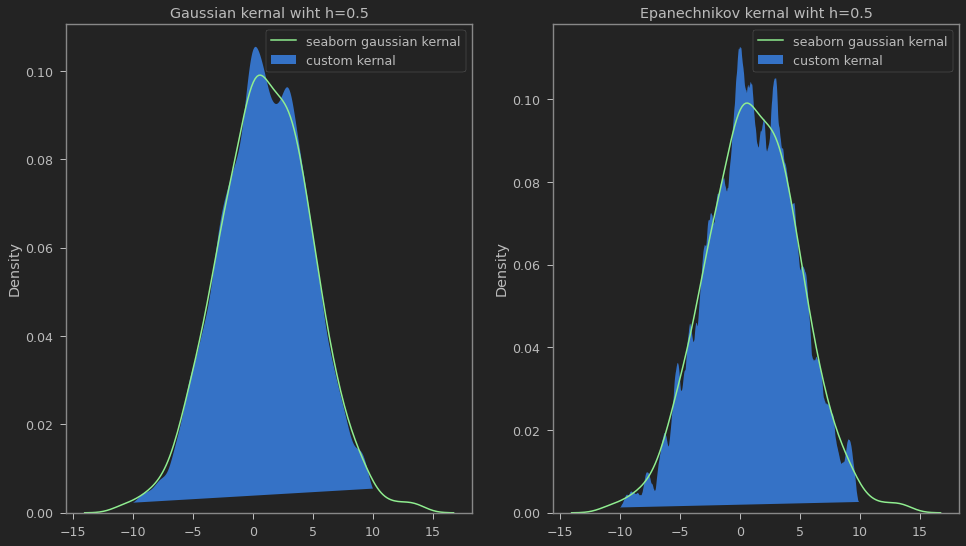

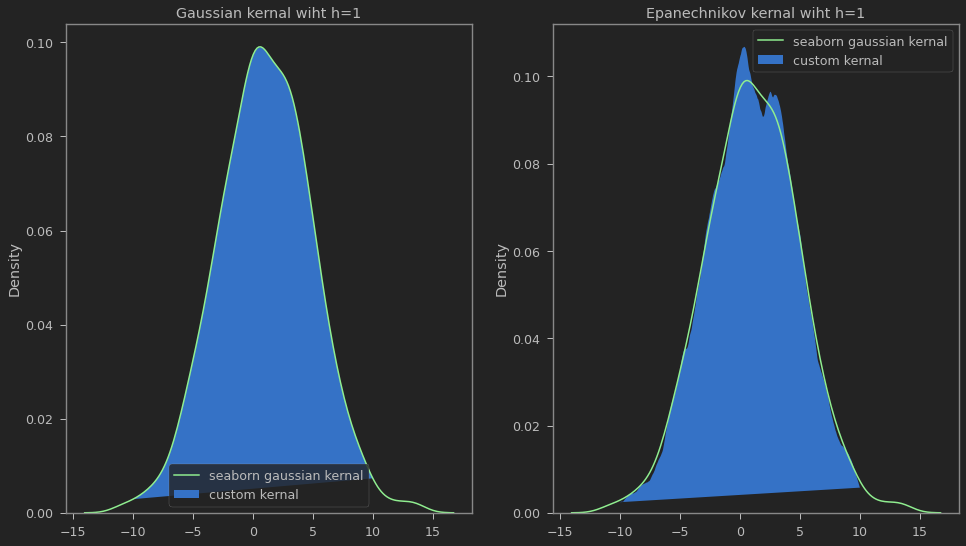

In [14]:
for h in h_list:
    fig, axs = plt.subplots(1, 2, figsize=(16, 9))
    
    axs[0].fill(x_linspace, estimate(x_linspace, X, h, gaussian_kernal), label='custom kernal')
    sns.distplot(X, hist=False, ax=axs[0], color='lightgreen', label='seaborn gaussian kernal')
    axs[0].set_title(f'Gaussian kernal wiht h={h}')
    axs[0].legend()
    
    axs[1].fill(x_linspace, estimate(x_linspace, X, h, epanechnikov_kernal), label='custom kernal')
    sns.distplot(X, hist=False, ax=axs[1], color='lightgreen', label='seaborn gaussian kernal')
    axs[1].set_title(f'Epanechnikov kernal wiht h={h}')
    axs[1].legend()
    
    plt.show()

## d) Розподіл зі щільністю $f(x) = exp(2-x), x \geq 2$

In [15]:
U = np.random.uniform(low=0, high=1, size=n)
dens_func = lambda x: np.exp(2 - x)
inv_dist_func = lambda x: 2 - np.log(1 - x)

dens_func_linspace = np.linspace(2, 10, 1000)
X = np.array(list(map(inv_dist_func, U)))

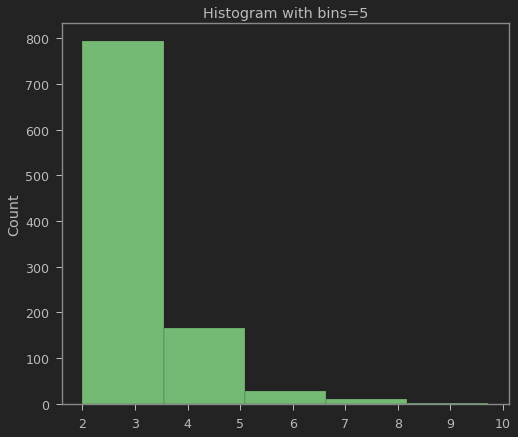

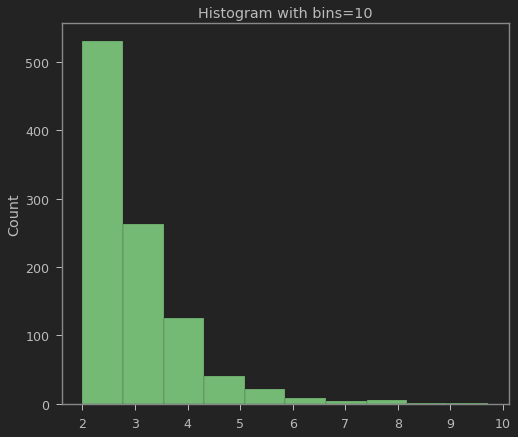

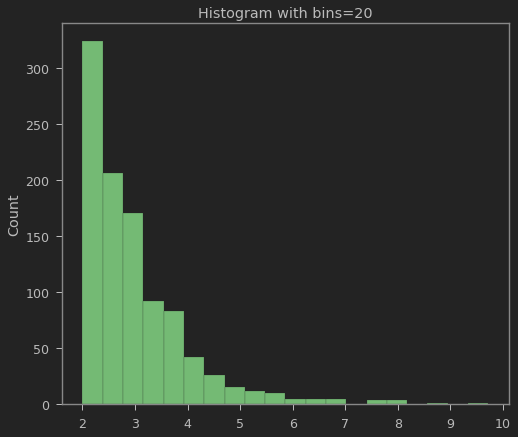

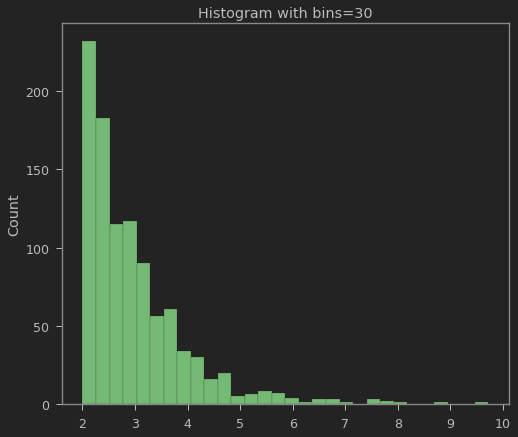

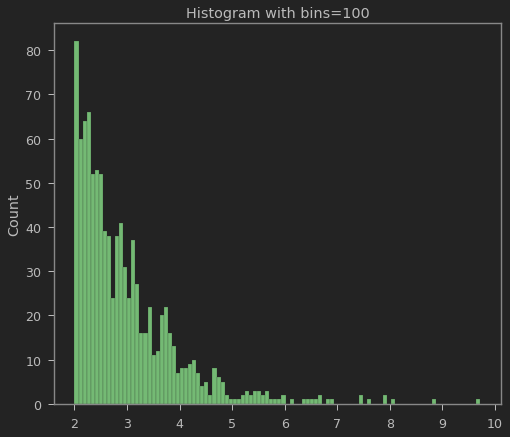

In [16]:
for bins in bins_list:
    sns.histplot(X, color='lightgreen', bins=bins);
    plt.title(f'Histogram with bins={bins}')
    plt.show()

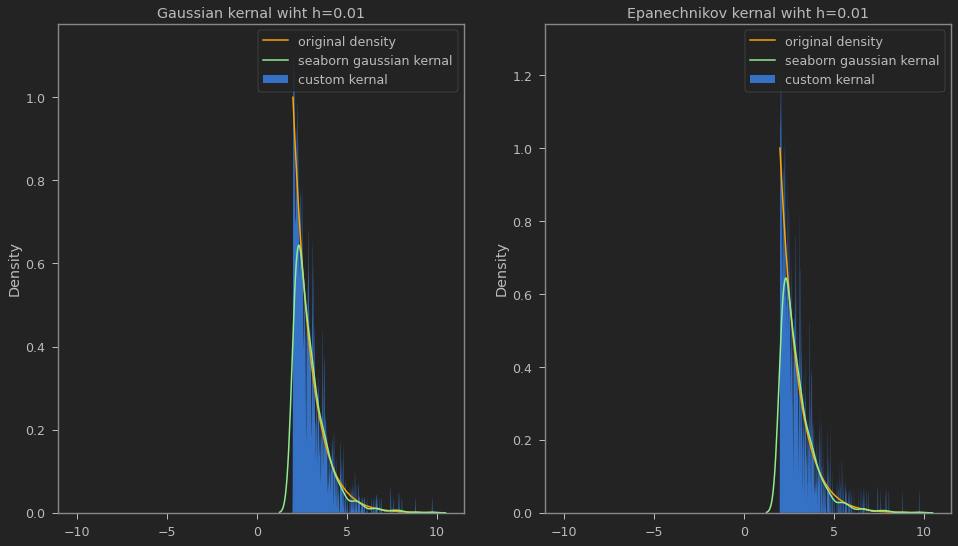

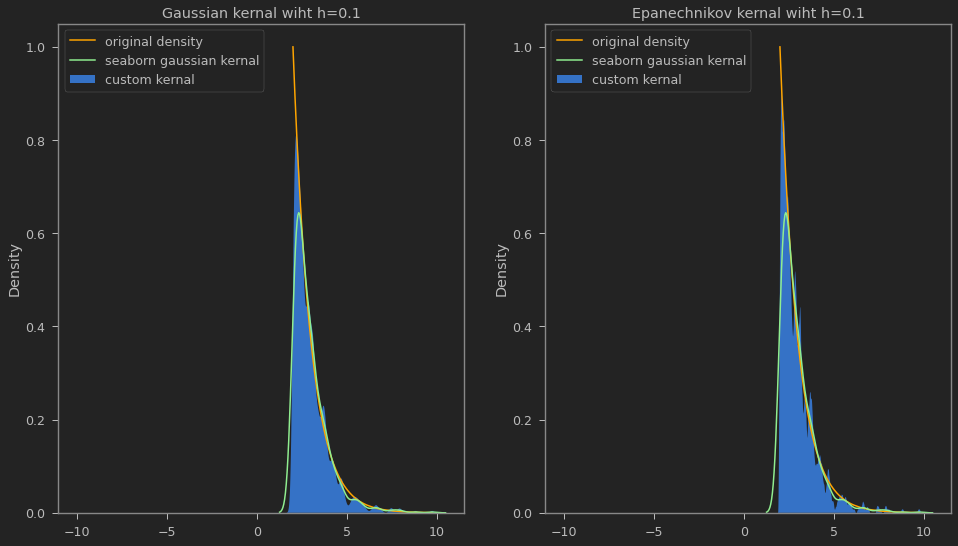

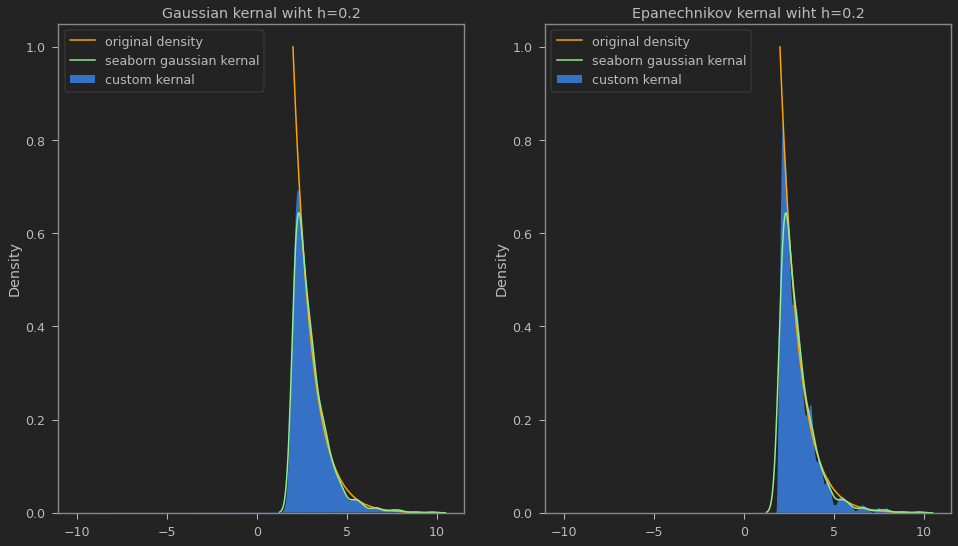

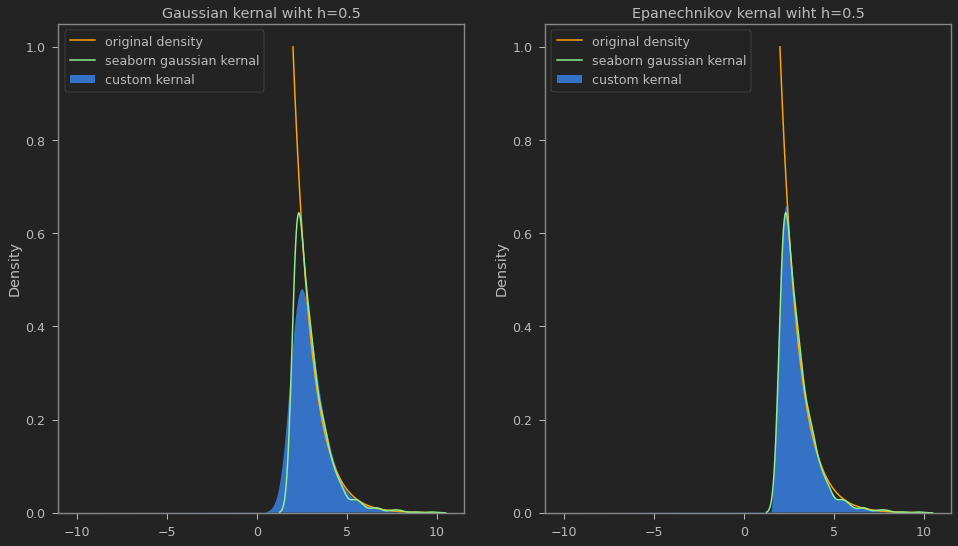

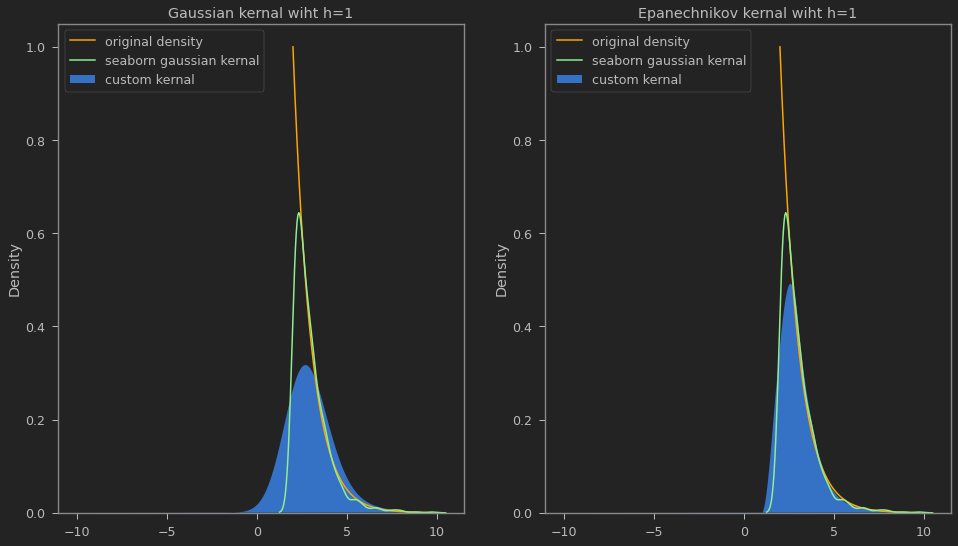

In [17]:
for h in h_list:
    fig, axs = plt.subplots(1, 2, figsize=(16, 9))
    
    axs[0].fill(x_linspace, estimate(x_linspace, X, h, gaussian_kernal), label='custom kernal')
    sns.lineplot(X, dens_func(X), color='orange', ax=axs[0], label='original density')
    sns.distplot(X, hist=False, ax=axs[0], color='lightgreen', label='seaborn gaussian kernal')
    axs[0].set_title(f'Gaussian kernal wiht h={h}')
    axs[0].legend()
    
    axs[1].fill(x_linspace, estimate(x_linspace, X, h, epanechnikov_kernal), label='custom kernal')
    sns.lineplot(X, dens_func(X), color='orange', ax=axs[1], label='original density')
    sns.distplot(X, hist=False, ax=axs[1], color='lightgreen', label='seaborn gaussian kernal')
    axs[1].set_title(f'Epanechnikov kernal wiht h={h}')
    axs[1].legend()

    plt.show()